# **Real Estate**

**1. Giriş**

<div>
<img src="https://images.unsplash.com/photo-1560518883-ce09059eeffa?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=666&q=80" width="400"/>
</div>

Bu çalışmada regresyon modelleri ve ensemble yöntemleri incelenecektir. Genel regresyon denkleminde hedef değişkenleri sürekli değerler alır ve birer sınıf ifade etmezler. Ancak sürekli değişkenlerin kesikli hale getirilmesi ile regresyon modelleri sınıflandırma için kullanılabilir. 

Genel regresyon denklemi aşağıda gösterilmiştir.

$Y\ =\ \beta_0+\ \beta_1\ x_1+\ \beta_2\ x_2+\ \ldots\ +\ \beta_n\ x_n$

Bu denklemde $Y$ değişkeni hedef değişkeni $X$ değişkenleri ise özellik/öznitelik değişkenlerini göstermektedir. $\beta$ katsayıları sklearn içerisinde `coef_`, $\beta_0$ ise `intercept_` olarak kaydedilir. Lineer regresyon analizinde 2 boyutlu düzlemde çalışıyorsak yani bir çıktı bir de özellik değişkenimiz varsa 2 değişkeni temsil eden en iyi çizgiyi çizmeye çalışırız. 

**Lineer Regresyon**: Bağımlı bir değişken($Y$) ile bağımsız bir değişken ($X$) serisinin arasındaki ilişkinin fonksiyonel biçimidir.  

**Lineer regresyon analizi**: «veriyi lineer bir çizgiye uydurma çalışmasına denir» veya «lineer modelleme» olarak da adlandırılır. 

**$Y$**: Çıktı, bağımlı, sonuç, etkilenen değişken  
**$X$**: Girdi, bağımsız, neden(faktör), etkileyen değişken  

Regresyon sorusu: Y’nin X’e bağlı koşullarını nasıl tahmin edebiliriz sorusudur.

[Data Source](https://www.kaggle.com/quantbruce/real-estate-price-prediction)

**1.1 Problem Tanımı**

Bu notebook içerisinde Lineer Regresyon ve Ensemble yöntemleri kullanarak bir konutun metrekare fiyatı tahmin edilecektir. Tercih edilen regresyon yöntemlerinin başarımları analiz edilip değerlendirilecektir.

**İçindekiler**

2.   [Veri Ön İşlemesi ve Analizi](#cell-id1)

3.   [Linear Regression](#cell-id2)

4.   [Extra Trees Regressor](#cell-id3)  

5.  [AdaBoost Regressor](#cell-id4)  

6.  [Bagging Regressor](#cell-id5) 

7.  [Random Forest Regressor](#cell-id6)  

8.  [Voting Regressor](#cell-id7)  

## Modülleri İçe Aktar

In [4]:
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, VotingRegressor
from scipy.spatial import distance

<a name="cell-id1"></a>
## **2.** Veri Ön İşlenmesi ve Analizi

### **2.1** Data Analysis

<div>
<img src="http://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQRAFBXDVOYkrh5SRy3u__lqWujfgKk0PT_hA&usqp=CAU" width="300"/>
</div>

In [5]:
data = pd.read_csv("/content/Real estate.csv")
data = data.drop(['X1 transaction date', 'No'],axis=1)
data

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [7]:
data.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
data.isnull().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

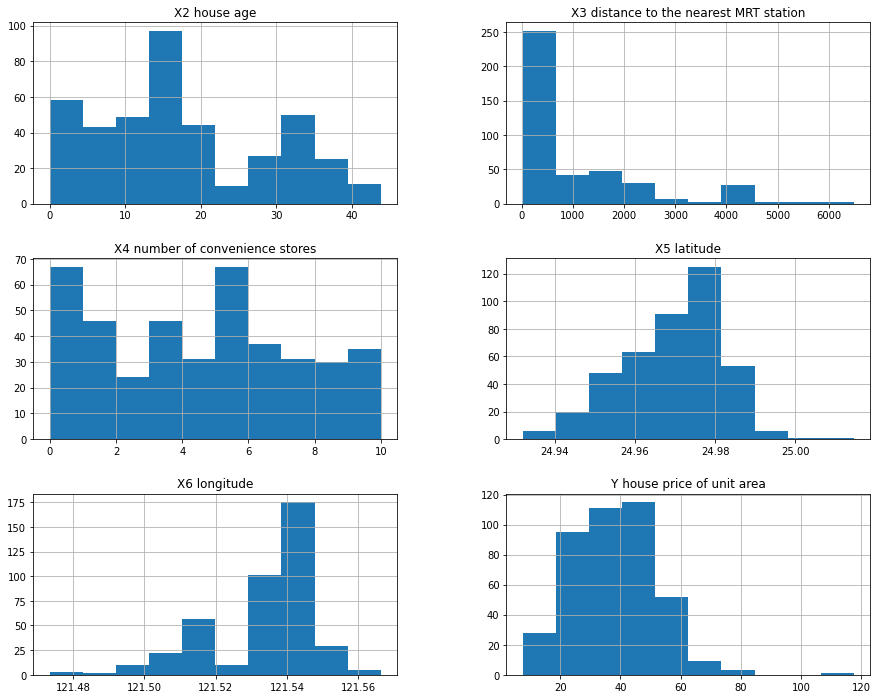

In [9]:
fig = data.hist(figsize=(15,12))

In [10]:
fig = px.box(data.iloc[::,:4].melt(), 
             y='value', 
             facet_col='variable', 
             color="variable",
             labels={'variable': 'feature'})

fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(
    title_text='Box Plot of Features',
    title_font_size=18,
    showlegend=False)

fig.show()

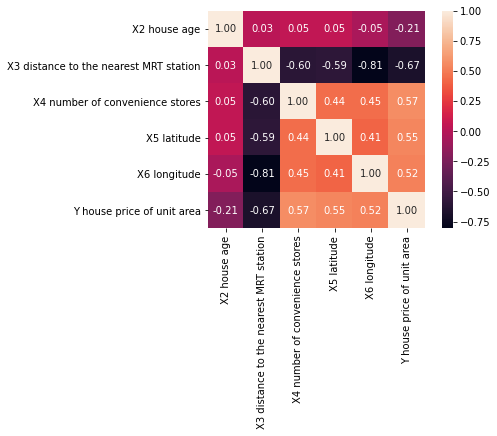

In [11]:
fig = sns.heatmap(data.corr(), annot = True, square = True, fmt='.2f')

Mahallede bakkal sayısı arttıkça ev fiyatları da yükseliyor.
Bu, bu nitelikler arasında pozitif bir ilişki olduğunu gösterir.

In [20]:
fig = px.bar(data, x="X4 number of convenience stores", 
             y="Y house price of unit area", 
             title="Long-Form Input")
fig.update_layout(
    title_font_size=18,
    width=600,
    height=500)
fig.show()

In [21]:
fig = px.scatter(data, x='X2 house age', 
                 y='Y house price of unit area', 
                 opacity=0.65,
                 trendline='ols', 
                 trendline_color_override='darkblue')
fig.update_layout(
    title="",
    title_font_size=18,
    width=600,
    height=500)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### **2.2** Train/Test Split

Verinin son kolonu metrekare fiyatını veren tahminleyeceğimiz etiket değerimiz olacaktır. 

Verinin %80'i modeli eğitmek için kullanılırken, %20'si ondan oluşturulan modeli test etmek için kullanılacak şekilde bölünür.

In [13]:
X = data.drop('Y house price of unit area', axis=1)
y = data['Y house price of unit area']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Neden yüksek korelasyona sahip verileri ayıklamalıyız?**

Regresyon tamamen eğitim verilerinden ağırlık vektörünü öğrenmek ve tahmin yapmak için kullanmakla ilgilidir. Ağırlık vektörünü elde etmek için gerekli formül aşağıda gösterilmiştir.

<div>
<img src="https://miro.medium.com/max/424/1*HHcgT3vxC66qpDYVdjPzQQ.png" width="200"/>
</div>

Bağımlı değişken “y”nin normal olarak varyans σ² ile dağıldığı varsayıldığında, olasılıksal bir regresyon görüşüne sahibiz. Bu varsayım altında, yukarıdaki ağırlık vektörü Wₗₛ'nin varyansının matematiksel olarak gösterilebilir.

<div>
<img src="https://miro.medium.com/max/149/1*h6KutxF-aDXedF8V5rQpmA.png" width="100"/>
</div>

Modelin yeterince kararlı olması için yukarıdaki varyansın düşük olması gerekir. Ağırlıkların varyansının yüksek olması modelin verilere çok duyarlı olduğu anlamına gelir. Varyans yüksekse ağırlıklar eğitim verileriyle büyük ölçüde farklılık gösterir. Bu, modelin test verileriyle iyi performans göstermeyebileceği anlamına gelir. Yani, şimdi doğal soru şu olurdu:
Wₗₛ'nin varyansı ne zaman büyük olacak?
Şimdi, yüksek oranda ilişkili özelliklere sahip olduğumuzda, Wₗₛ'nin varyansının büyük olacağını tahmin etmiş olmalısınız. Evet, tahmin doğru!! Ama bunun matematiksel olarak nasıl doğru olduğunu görelim. Herhangi bir nxd matrisi şu şekilde ayrıştırılabilir:

<div>
<img src="https://miro.medium.com/max/139/1*pjnfR1DPa_mAkJZe3XtGvg.png" width="100"/>
</div>

Yukarıdaki ayrıştırmaya “Tekil Değer Ayrışımı” denir. Yukarıdaki denklemdeki “S” matrisi negatif olmayan bir köşegen matristir. Bu ayrıştırma kullanılarak, Wₗₛ'nin varyansı şu şekilde yeniden yazılabilir:

<div>
<img src="https://miro.medium.com/max/469/1*YbO_1ZymvlFFa_TDzAKaoA.png" width="300"/>
</div>

Veri setinde yüksek korelasyonlu özelliklere sahip olduğumuzda, “S” matrisindeki değerler küçük olacaktır. Böylece “S” matrisinin ters karesi (yukarıdaki denklemde S^-2) büyük olacak ve bu da Wₗₛ'nin varyansını büyük kılacaktır.
Bu nedenle, iki özellik yüksek oranda ilişkiliyse veri kümesinde yalnızca bir özelliği tutmamız önerilir.

In [ ]:
# En yüksek mutlak 5 korelasyonu sıralayalım
for col in X.columns:
    top_5_corr = abs(X.corr()[col]).nlargest(n=5) # en yüksek korelasyona sahip 5 değeri alalım
    # print(top_5_corr)
    # eğer 0.75'ten büyük değer varsa yazdır.
    for index, value in top_5_corr.items():
        if 1> value >=0.75:
            print(index, " vs ", col, "-> değişkenleri yüksek korelasyona sahip: ", value)

X6 longitude  vs  X3 distance to the nearest MRT station -> değişkenleri yüksek korelasyona sahip:  0.8063167695693655
X3 distance to the nearest MRT station  vs  X6 longitude -> değişkenleri yüksek korelasyona sahip:  0.8063167695693655


### **2.3** Normalization

Veri içerisindeki özniteliklerin model eğitiminde birbirlerine baskın gelmemesi açısından değerler 0 ile 1 arasına normalize edilir.

In [14]:
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)
#y_train = scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
#y_train

<a name="cell-id2"></a>
## **3.** Linear Regression

Regresyon eğrisi temsil ettiği noktalara olabildiğince en yakından geçmeye çalışır. Bunun için her bir noktanın eğriye olan uzaklığı hesaplanır ve toplam mesafeyi en küçük kılan doğru regresyon doğrusu olarak seçilir.

<div>
<img src="https://www.veribilimiokulu.com/wp-content/uploads/2017/07/Regreyon_Dogrusu_R_kare.png" width="300"/>
</div>

Yukarıda meslek erbabı örnek verisi için kazanç ve tecrübe arasındaki ilişkiyi gösteren bir grafik bulunuyor. Bu grafiğe göre tecrübe arttıkça kazanç da artmaktadır. Grafiğe bakarak doğrusal regresyon formülü şu şekilde yazılabilir:

Kazanç = Sabit + β x Tecrübe

Eğer bağımsız değişkenler birden fazla olursa bu kez çoklu regresyon modeli kurmamız gerekir. Basit lineer regresyonda olduğu gibi katsayılar ve kesme terimi bulunduktan sonra regresyon modeli kurulabilir. Çoklu regresyonda modele alınacak değişkenlerin seçilmesi en önemli aşamayı oluşturur.

In [15]:
reg = LinearRegression()
lr = reg.fit(x_train, y_train)

In [16]:
lr.coef_

array([-10.65092446, -30.41944609,  11.14971411,  19.41099823,
        -3.22311955])

In [17]:
lr.intercept_

36.62212045740741

Elde edilen regresyon modeline bakalım:

$Y\ =\ \beta_0+\ \beta_1\ x_1+\ \beta_2\ x_2+\ \ldots\ +\ \beta_n\ x_n$

In [18]:
print("Elde edilen regresyon modeli: Y={}{}X {}X + {}X + {}X {}X".format(lr.intercept_,lr.coef_[0],lr.coef_[1],lr.coef_[2],lr.coef_[3],lr.coef_[4]))

Elde edilen regresyon modeli: Y=36.62212045740741-10.650924459903854X -30.419446091604897X + 11.149714112746564X + 19.410998225559517X -3.223119554149541X


${\displaystyle R^{2}}$ **Score**

${\displaystyle {\bar {y}}={\frac {1}{n}}\sum _{i=1}^{n}y_{i}}$

${\displaystyle SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2}}$

${\displaystyle SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}}$

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/1920px-Coefficient_of_Determination.svg.png" width="350"/>
</div>

Doğrusal regresyon (sağda), basit ortalamaya (soldaki grafikte) kıyasla verilere ne kadar iyi uyarsa, ${\displaystyle R^{2}}$ değeri 1'e o kadar yakın olur. Mavi karelerin alanları, doğrusal regresyona göre kare artıkları (residual) temsil eder. Kırmızı karelerin alanları, ortalama değere göre kare artıkları (residual) temsil eder.

${\displaystyle R^{2}=1-{\frac {\color {blue}{SS_{\text{res}}}}{\color {red}{SS_{\text{tot}}}}}}$

Regresyon iyilik uyum indeksi (goodness of fit) olarak ${\displaystyle R^{2}}$  kullanıldığında artıkların toplam karesi ne kadar düşük olursa uyum o kadar yüksek olmaktadır. Ancak bağımsız değişken sayısı arttıkça payda düşmeye devam edecektir. Böylelikle ${\displaystyle R^{2}}$ düşmeyecek ve ne kadar çok değişken modele katılırsa o kadar yüksek bir uyum ortaya çıkacaktır. Fakat teorikte görülen gerçekte de öyle midir? Model karmaşıklığını azaltmak ve anlaşılabilir, yorumlanabilir (interpretable) modeller oluşturmak için hedef değişkene etkisi olmayan, az olan, etkisi ihmal edilebilen değişkenler modele dahil edilmez. Bu sebeple iyilik uyum indeksi kullanırken düzeltilmiş ${\displaystyle R^{2}}$ kullanılmaktadır. Düzeltilmiş ${\displaystyle R^{2}}$ gereksiz eklenen bağımsız değişkenleri cezalandırır. 
Düzeltilmiş ${\displaystyle R^{2}}$ aşağıda gösterilmiştir;

${\displaystyle {\bar {R}}^{2}=1-(1-R^{2}){n-1 \over n-p-1}}$

(p: bağımsız değişken sayısı, n: örneklem büyüklüğü)

Model başarım ölçümleri için kullanabileceğimiz diğer ölçütler:
1. **Mean Absolute Error(MAE): Ortalama Mutlak Hata**

> Ortalama mutlak hata iki sürekli değişken arasındaki farkın ölçüsüdür. MAE, her gerçek değer ile veriye en iyi uyan çizgi arasındaki ortalama dikey mesafedir. MAE aynı zamanda her veri noktası ile en iyi uyan çizgi arasındaki ortalama yatay mesafedir.


$MAE = 1/n\times\sum{|y-y_{tahmin}|}$

2. **Mean squared error(MSE) Ortalama Karesel Hata**

> Basitçe, ortalama kare hata bir regresyon eğrisinin bir dizi noktaya ne kadar yakın olduğunu söyler. MSE, bir makine öğrenmesi modelinin, tahminleyicinin performansını ölçer, her zaman pozitif değerlidir.

$MSE = 1/n\times\sum{(y-y_{tahmin})^2}$

3. **Root Mean Squared Error (RMSE): Ortalama Karesel Hataların Karekökü**

> RMSE tahmin hatalarının (kalıntıların) standart sapmasıdır. Yani, kalıntılar, regresyon hattının veri noktalarından ne kadar uzakta olduğunun bir ölçüsüdür; RMSE ise bu kalıntıların ne kadar yayıldığının bir ölçüsüdür. Başka bir deyişle, verilere en iyi uyan çizgi etrafında o verilerin ne kadar yoğun olduğunu söyler.

$RMSE = \sqrt{1/n\times\sum{(y-y_{tahmin})^2}}$

In [22]:
y_pred = lr.predict(x_test)
print('R2-Score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2-Score:  0.5282882910821667
MSE:  71.59925851098463
MAE:  7.03243696575574


In [23]:
lr_mse_scores = cross_val_score(reg, 
                         x_train, 
                         y_train, 
                         cv=5, 
                         scoring='neg_mean_squared_error') 

lr_mse_scores = [abs(i) for i in lr_mse_scores]
lr_mse_scores

[185.5775456790849,
 52.474119827560344,
 94.06015316308935,
 74.24636651025264,
 55.035311372629735]

In [24]:
lr_mae_scores = cross_val_score(reg, 
                         x_train, 
                         y_train, 
                         cv=5, 
                         scoring='neg_mean_absolute_error') 

lr_mae_scores = [abs(i) for i in lr_mae_scores]
lr_mae_scores

[8.58440432522593,
 5.823120668338493,
 6.881293600285997,
 5.941468769782486,
 6.033468204557975]

In [25]:
colors = ['Positive' if c > 0 else 'Negative' for c in lr.coef_]

fig = px.bar(
    x=X.columns, y=lr.coef_, color=colors,
    color_discrete_sequence=['red', 'green'],
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting price'
)
fig.update_layout(
    title_font_size=18,
    width=600,
    height=500)
fig.show()

<div>
<img src="https://miro.medium.com/max/875/1*GpFUY86SL1zrXkruEOQKuQ.png" width="500"/>
</div>

Yukarıdaki resim elde edilen denklemin fiziksel yorumunun daha iyi anlaşılması için verilmiştir.

$Y\ =\ \beta_0+\ \beta_1\ x_1+\ \beta_2\ x_2+\ \ldots\ +\ \beta_n\ x_n$

In [26]:
def plot_actualvspredicted(y_test, y_pred):
    fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Ground truth', 'y': 'Prediction'})
    fig.add_shape(
        type="line", line=dict(dash='dash'),
        x0=y_test.min(), y0=y_test.min(),
        x1=y_test.max(), y1=y_test.max())
    fig.update_layout(
        title='Simple actual vs predicted',
        title_font_size=18,
        width=600,
        height=500)
    fig.show()

In [27]:
plot_actualvspredicted(y_test, y_pred)

In [28]:
copy_X = X.copy()
copy_X = pd.DataFrame(scaler.fit_transform(copy_X), columns=copy_X.columns)

vis_data = data.copy()
vis_data['prediction'] = lr.predict(copy_X)
train_idx, test_idx = train_test_split(vis_data.index, test_size=0.2, random_state=1)
vis_data['split'] = 'train'
vis_data.loc[test_idx, 'split'] = 'test'

fig = px.scatter(
    vis_data, x='Y house price of unit area', y='prediction',
    marginal_x='histogram', marginal_y='histogram',
    color='split', trendline='ols'
)
fig.update_traces(histnorm='probability', selector={'type':'histogram'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.update_layout(
    title='Enhanced prediction error analysis',
    title_font_size=18,
    width=900,
    height=700)
fig.show()

Doğruya isabet edemeyen her noktaya artık (residual) denir. Eğer tüm noktalar doğru üzerine denk gelseydi mükemmel bir resgresyon eğrisi olacaktı ancak bu gerçekte mümkün değildir. Bu nedenle eğriye denk gelmeyen her nokta bizim için birer artıktır.

Artıklar bağımlı değişkenin ( y ) gözlenen değeri ile tahmin edilen değeri ( ŷ ) arasındaki farka ( e ) denir . Her veri noktasının bir artık değeri vardır.

Artık = Gözlenen değer - Tahmin edilen değer

$e = y - ŷ$

Artıkların toplamı ve ortalaması sıfıra eşittir. 
Yani, $Σ e = 0$ ve $e = 0$.

In [29]:
vis_data['residual'] = vis_data['prediction'] - vis_data['Y house price of unit area']

fig = px.scatter(
    vis_data, x='prediction', y='residual',
    marginal_y='violin',
    color='split', trendline='ols'
)
fig.add_annotation(
        x=10,
        y=40,
        xref="x",
        yref="y",
        text="Test R^2 score: {0:.2f}".format(r2_score(y_test, y_pred)),
        showarrow=False,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="#ffffff"
            ),
        align="center",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8
        )
fig.add_annotation(
        x=10,
        y=30,
        xref="x",
        yref="y",
        text="Train R^2 score: {0:.2f}".format(r2_score(y_train, lr.predict(x_train))),
        showarrow=False,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="#ffffff"
            ),
        align="center",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8)
fig.update_layout(
    title='Residual analysis',
    title_font_size=18,
    width=900,
    height=530)
fig.show()#ordinary list squares trendline

In [30]:
N_FOLD = 5

model = LassoCV(cv=N_FOLD, normalize=True)
model.fit(x_train, y_train)
mean_alphas = model.mse_path_.mean(axis=-1)

fig = go.Figure([
    go.Scatter(
        x=model.alphas_, y=model.mse_path_[:, i],
        name=f"Fold: {i+1}", opacity=.5, line=dict(dash='dash'),
        hovertemplate="alpha: %{x} <br>MSE: %{y}"
    )
    for i in range(N_FOLD)
])
fig.add_traces(go.Scatter(
    x=model.alphas_, y=mean_alphas,
    name='Mean', line=dict(color='black', width=3),
    hovertemplate="alpha: %{x} <br>MSE: %{y}",
))

fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=model.alpha_, y0=0,
    x1=model.alpha_, y1=1,
    yref='paper'
)

fig.update_layout(
    xaxis_title='alpha',
    xaxis_type="log",
    yaxis_title="Mean Square Error (MSE)",
    title='Visualize regularization across cross-validation folds',
    title_font_size=18,
    width=900,
    height=530)
fig.show()

In [31]:
def plot_prediction_comp(y_test, y_pred):    
    fig = go.Figure()
    fig.add_trace(go.Scatter(y=np.array(y_test),
                        mode='lines+markers',
                        name='Real house price'))
    fig.add_trace(go.Scatter(y=y_pred,
                        mode='lines+markers',
                        name='Train-test split'))
    fig.add_annotation(
            x=37,
            y=62,
            xref="x",
            yref="y",
            text='Euclidean distance between prices for real vs train-test: %.3f' % distance.euclidean(y_test, y_pred),
            showarrow=False,
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="#ffffff"
                ),
            align="center",
            ax=20,
            ay=-30,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="#ff7f0e",
            opacity=0.8)
    fig.update_layout(
        title='Predictions Comparison (same split)',
        xaxis_title='Per house',
        yaxis_title='Price',
        title_font_size=18,
        width=800,
        height=540)
    fig.show()

plot_prediction_comp(y_test, y_pred)

<a name="cell-id3"></a>
## **4.** Extra Trees Regressor

In [32]:
N_FOLD = 6

model = ExtraTreesRegressor()

param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': range(2, 5)
}
grid = GridSearchCV(model, param_grid, cv=N_FOLD)
grid.fit(x_train, y_train)
grid_df = pd.DataFrame(grid.cv_results_)

melted = (
    grid_df
    .rename(columns=lambda col: col.replace('param_', ''))
    .melt(
        value_vars=[f'split{i}_test_score' for i in range(N_FOLD)],
        id_vars=['mean_test_score', 'mean_fit_time', 'criterion', 'max_depth'],
        var_name="cv_split",
        value_name="r_squared"
    )
)

melted['cv_split'] = (
    melted['cv_split']
    .str.replace('_test_score', '')
    .str.replace('split', '')
)

fig_hmap = px.density_heatmap(
    melted, x="max_depth", y='criterion',
    histfunc="sum", z="r_squared",
    title='Grid search results on individual fold',
    hover_data=['mean_fit_time'],
    facet_col="cv_split", facet_col_wrap=3,
    labels={'mean_test_score': "mean_r_squared"}
)

fig_box = px.box(
    melted, x='max_depth', y='r_squared',
    title='Grid search results ',
    hover_data=['mean_fit_time'],
    points='all',
    color="criterion",
    hover_name='cv_split',
    labels={'mean_test_score': "mean_r_squared"}
)

fig_hmap.update_layout(
    title_font_size=18,
    width=750,
    height=500)

fig_box.update_layout(
    title_font_size=18,
    width=750,
    height=500)

fig_hmap.show()
fig_box.show()

In [33]:
grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 4}

In [34]:
reg = ExtraTreesRegressor(criterion='mae', max_depth=4)
extrr = reg.fit(x_train, y_train)

In [35]:
extrr_mse_scores = cross_val_score(reg, 
                         x_train, 
                         y_train, 
                         cv=5, 
                         scoring='neg_mean_squared_error') 

extrr_mse_scores = [abs(i) for i in extrr_mse_scores]
extrr_mse_scores

[169.13822735820892,
 35.88467835984844,
 68.54395931439396,
 51.422478488636344,
 41.715399325757595]

In [36]:
extrr_mae_scores = cross_val_score(reg, 
                         x_train, 
                         y_train, 
                         cv=5, 
                         scoring='neg_mean_absolute_error') 

extrr_mae_scores = [abs(i) for i in extrr_mae_scores]
extrr_mae_scores

[7.624962686567162,
 4.809886363636363,
 5.640984848484846,
 4.501477272727272,
 4.839219696969697]

In [37]:
y_pred = extrr.predict(x_test)
print('R2-Score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2-Score:  0.7833924441982306
MSE:  32.87800597289157
MAE:  4.562355421686747


In [38]:
plot_actualvspredicted(y_test, y_pred)

In [39]:
plot_prediction_comp(y_test, y_pred)

<a name="cell-id4"></a>
## **5.** AdaBoost Regressor

In [40]:
N_FOLD = 6

model = AdaBoostRegressor()

param_grid = {
    'loss': ['linear', 'square', 'exponential']
}
grid = GridSearchCV(model, param_grid, cv=N_FOLD)
grid.fit(x_train, y_train)
grid_df = pd.DataFrame(grid.cv_results_)

melted = (
    grid_df
    .rename(columns=lambda col: col.replace('param_', ''))
    .melt(
        value_vars=[f'split{i}_test_score' for i in range(N_FOLD)],
        id_vars=['mean_test_score', 'mean_fit_time', 'loss'],
        var_name="cv_split",
        value_name="r_squared"
    )
)

melted['cv_split'] = (
    melted['cv_split']
    .str.replace('_test_score', '')
    .str.replace('split', '')
)

fig_hmap = px.density_heatmap(
    melted, x="mean_test_score", y='loss',
    histfunc="sum", z="r_squared",
    title='Grid search results on individual fold',
    hover_data=['mean_fit_time'],
    facet_col="cv_split", facet_col_wrap=3,
    labels={'mean_test_score': "mean_r_squared"}
)

fig_box = px.box(
    melted, x='loss', y='r_squared',
    title='Grid search results ',
    hover_data=['mean_fit_time'],
    points='all',
    color="loss",
    hover_name='cv_split',
    labels={'mean_test_score': "mean_r_squared"}
)

fig_hmap.update_layout(
    title_font_size=18,
    width=750,
    height=500)

fig_box.update_layout(
    title_font_size=18,
    width=750,
    height=500)

fig_hmap.show()
fig_box.show()

In [41]:
grid.best_params_

{'loss': 'exponential'}

In [42]:
reg = AdaBoostRegressor(loss='linear', learning_rate=0.1, n_estimators=50)
ada = reg.fit(x_train, y_train)

In [43]:
ada_mse_scores = cross_val_score(reg, 
                         x_train, 
                         y_train, 
                         cv=5, 
                         scoring='neg_mean_squared_error') 

ada_mse_scores = [abs(i) for i in ada_mse_scores]
ada_mse_scores

[145.91442907361684,
 38.948382074346895,
 61.81149816303923,
 49.29138429529529,
 51.702279491206966]

In [44]:
ada_mae_scores = cross_val_score(reg, 
                         x_train, 
                         y_train, 
                         cv=5, 
                         scoring='neg_mean_absolute_error') 

ada_mae_scores = [abs(i) for i in ada_mae_scores]
ada_mae_scores

[7.223969478932404,
 5.153237392288816,
 5.757562563038015,
 4.616625074122589,
 5.695177049809564]

In [45]:
y_pred = ada.predict(x_test)
print('R2-Score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2-Score:  0.6844319549835005
MSE:  47.89882804642881
MAE:  5.351804245768894


In [46]:
plot_actualvspredicted(y_test, y_pred)

In [47]:
plot_prediction_comp(y_test, y_pred)

<a name="cell-id5"></a>
## **6.** Bagging Regressor





In [48]:
model = BaggingRegressor()
param_grid = {'max_samples': [i for i in range(1,50)],
              'max_features': [i for i in range(1,250)]}
grid = GridSearchCV(estimator= model, param_grid= param_grid, n_jobs=-1)
grid = grid.fit(x_train, y_train)

In [49]:
grid.best_params_

{'max_features': 4, 'max_samples': 45}

In [50]:
reg = BaggingRegressor(max_features=4, max_samples=48)
bagg = reg.fit(x_train, y_train)

In [51]:
bagg_mse_scores = cross_val_score(reg, 
                         x_train, 
                         y_train, 
                         cv=5, 
                         scoring='neg_mean_squared_error') 

bagg_mse_scores = [abs(i) for i in bagg_mse_scores]
bagg_mse_scores

[152.5722113598673,
 36.31162304545454,
 76.09959524410776,
 52.092479208754206,
 48.312587794612796]

In [52]:
bagg_mae_scores = cross_val_score(reg, 
                         x_train, 
                         y_train, 
                         cv=5, 
                         scoring='neg_mean_absolute_error') 

bagg_mae_scores = [abs(i) for i in bagg_mae_scores]
bagg_mae_scores

[6.807686567164179,
 4.660378787878789,
 6.320378787878789,
 4.731136363636362,
 5.639393939393939]

In [53]:
y_pred = bagg.predict(x_test)
print('R2-Score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2-Score:  0.35847082090373994
MSE:  97.37518206157965
MAE:  7.8644979919678715


In [54]:
plot_actualvspredicted(y_test, y_pred)

In [55]:
plot_prediction_comp(y_test, y_pred)

<a name="cell-id6"></a>
## **7.** Random Forest Regressor

In [56]:
N_FOLD = 6

model = RandomForestRegressor()

param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': range(2, 5)
}
grid = GridSearchCV(model, param_grid, cv=N_FOLD)
grid.fit(x_train, y_train)
grid_df = pd.DataFrame(grid.cv_results_)

melted = (
    grid_df
    .rename(columns=lambda col: col.replace('param_', ''))
    .melt(
        value_vars=[f'split{i}_test_score' for i in range(N_FOLD)],
        id_vars=['mean_test_score', 'mean_fit_time', 'criterion', 'max_depth'],
        var_name="cv_split",
        value_name="r_squared"
    )
)

melted['cv_split'] = (
    melted['cv_split']
    .str.replace('_test_score', '')
    .str.replace('split', '')
)

fig_hmap = px.density_heatmap(
    melted, x="max_depth", y='criterion',
    histfunc="sum", z="r_squared",
    title='Grid search results on individual fold',
    hover_data=['mean_fit_time'],
    facet_col="cv_split", facet_col_wrap=3,
    labels={'mean_test_score': "mean_r_squared"}
)

fig_box = px.box(
    melted, x='max_depth', y='r_squared',
    title='Grid search results ',
    hover_data=['mean_fit_time'],
    points='all',
    color="criterion",
    hover_name='cv_split',
    labels={'mean_test_score': "mean_r_squared"}
)

fig_hmap.update_layout(
    title_font_size=18,
    width=750,
    height=500)

fig_box.update_layout(
    title_font_size=18,
    width=750,
    height=500)

fig_hmap.show()
fig_box.show()

In [57]:
grid.best_params_

{'criterion': 'mae', 'max_depth': 4}

In [58]:
reg = RandomForestRegressor(criterion='mae', max_depth=4)
randforestr = reg.fit(x_train, y_train)

In [59]:
randforestr_mse_scores = cross_val_score(reg, 
                         x_train, 
                         y_train, 
                         cv=5, 
                         scoring='neg_mean_squared_error') 

randforestr_mse_scores = [abs(i) for i in randforestr_mse_scores]
randforestr_mse_scores

[135.96918459328353,
 27.046345750000043,
 64.75726972348484,
 47.3909922462121,
 44.09854506818182]

In [60]:
randforestr_mae_scores = cross_val_score(reg, 
                         x_train, 
                         y_train, 
                         cv=5, 
                         scoring='neg_mean_absolute_error') 

randforestr_mae_scores = [abs(i) for i in randforestr_mae_scores]
randforestr_mae_scores

[6.6683805970149255,
 4.2174924242424225,
 5.429393939393939,
 4.851522727272726,
 4.798530303030301]

In [61]:
y_pred = randforestr.predict(x_test)
print('R2-Score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2-Score:  0.7090310647661868
MSE:  44.165026262048166
MAE:  5.232825301204819


In [62]:
plot_actualvspredicted(y_test, y_pred)

In [63]:
plot_prediction_comp(y_test, y_pred)

<a name="cell-id7"></a>
## **8.** Voting Regressor

In [64]:
reg = VotingRegressor([('rf', randforestr), ('lr', lr), ('ada', ada), ('bg', bagg), ('extrr', extrr)])
votingr = reg.fit(x_train, y_train)

In [65]:
pred1 = lr.predict(x_test.head(10))
pred2 = ada.predict(x_test.head(10))
pred3 = bagg.predict(x_test.head(10))
pred4 = extrr.predict(x_test.head(10))
pred5 = randforestr.predict(x_test.head(10))
pred6 = votingr.predict(x_test.head(10))

fig = go.Figure()

fig.add_trace(go.Scatter(mode='markers',
                         y=pred1,
                         marker_symbol='circle',
                         marker_size=10,
                         name='Linear Regression'))
fig.add_trace(go.Scatter(mode='markers',
                         y=pred2,
                         marker_symbol='square',
                         marker_size=10,
                         name='AdaBoost Regressor'))
fig.add_trace(go.Scatter(mode='markers',
                         y=pred3,
                         marker_symbol='cross',
                         marker_size=10,
                         name='Bagging Regressor'))
fig.add_trace(go.Scatter(mode='markers',
                         y=pred4,
                         marker_symbol='x',
                         marker_size=10,
                         name='Extra Trees Regressor'))
fig.add_trace(go.Scatter(mode='markers',
                         y=pred5,
                         marker_symbol='hexagon',
                         marker_size=10,
                         name='RandomForest Regressor'))
fig.add_trace(go.Scatter(mode='markers',
                         y=pred6,
                         marker_symbol='star-triangle-up',
                         marker_size=10,
                         name='Voting Regressor'))
fig.add_trace(go.Scatter(mode='markers',
                         y=y_test.head(10).to_list(),
                         marker_symbol='circle-x',
                         marker_size=10,
                         name='Real Price'))
fig.update_layout(
    title="Regressor predictions and their average",
    xaxis_title="Test samples",
    yaxis_title="Predicted prices",
    title_font_size=18,
    width=700,
    height=600)
fig.show()

In [66]:
votingr_mse_scores = cross_val_score(reg, 
                         x_train, 
                         y_train, 
                         cv=5, 
                         scoring='neg_mean_squared_error') 

votingr_mse_scores = [abs(i) for i in votingr_mse_scores]
votingr_mse_scores

[151.58869095950357,
 32.90422300800352,
 63.178703568711086,
 50.76191970835992,
 44.24874139450315]

In [67]:
votingr_mae_scores = cross_val_score(reg, 
                         x_train, 
                         y_train, 
                         cv=5, 
                         scoring='neg_mean_absolute_error') 

votingr_mae_scores = [abs(i) for i in votingr_mae_scores]
votingr_mae_scores

[7.173057199875793,
 4.533192195477637,
 5.5094526154233705,
 4.510430622012076,
 4.836387018547027]

In [68]:
y_pred = votingr.predict(x_test)
print('R2-Score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2-Score:  0.7457841739848967
MSE:  38.58641687355146
MAE:  4.811108888025016


In [69]:
plot_actualvspredicted(y_test, y_pred)

In [70]:
plot_prediction_comp(y_test, y_pred)

Tüm tahmincilerin karşılaştırılması

In [71]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=lr_mse_scores,
    name='Linear Regression',
    boxmean='sd' 
))
fig.add_trace(go.Box(
    y=extrr_mse_scores,
    name='Extra Trees Regressor',
    boxmean='sd' 
))
fig.add_trace(go.Box(
    y=ada_mse_scores,
    name='Ada Boost Regressor',
    boxmean='sd' 
))
fig.add_trace(go.Box(
    y=bagg_mse_scores,
    name='Bagging Regressor',
    boxmean='sd' 
))
fig.add_trace(go.Box(
    y=randforestr_mse_scores,
    name='Random Forest Regressor',
    boxmean='sd' 
))
fig.add_trace(go.Box(
    y=votingr_mse_scores,
    name='Voting Regressor',
    boxmean='sd' 
))
fig.update_layout(
    title='MSE for each model',
    title_font_size=18,
    width=900,
    height=400)
fig.show()

In [72]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=lr_mae_scores,
    name='Linear Regression',
    boxmean='sd' 
))
fig.add_trace(go.Box(
    y=extrr_mae_scores,
    name='Extra Trees Regressor',
    boxmean='sd' 
))
fig.add_trace(go.Box(
    y=ada_mae_scores,
    name='Ada Boost Regressor',
    boxmean='sd' 
))
fig.add_trace(go.Box(
    y=bagg_mae_scores,
    name='Bagging Regressor',
    boxmean='sd' 
))
fig.add_trace(go.Box(
    y=randforestr_mae_scores,
    name='Random Forest Regressor',
    boxmean='sd' 
))
fig.add_trace(go.Box(
    y=votingr_mae_scores,
    name='Voting Regressor',
    boxmean='sd' 
))
fig.update_layout(
    title='MAE for each model',
    title_font_size=18,
    width=900,
    height=400)
fig.show()

#**Referanslar**


*   [Scikit-Learn](https://scikit-learn.org/stable/)
*   [Precision & Recall](https://en.wikipedia.org/wiki/Precision_and_recall)
*   [Lineer Regression Tutorial](https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1)
*   [Scikit-Learn Ensamblers](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) 
*   [Regression Tutorial](https://www.digitalvidya.com/blog/linear-regression/) 
*   [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) 
*   [Trick for regression](https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e) 
*   [R2-score](https://www.veribilimiokulu.com/r-kare-ve-duzeltilmis-r-kare/)
*   [Residual analysis](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-multiple-regression/mlr-residual-analysis-and-outliers.html)
*   [Regression Tutorial](https://medium.com/swlh/predictive-modelling-using-linear-regression-e0e399dc4745)
*   [ExtraTreessRegressor vs RandomForestRegressor](https://towardsdatascience.com/an-intuitive-explanation-of-random-forest-and-extra-trees-classifiers-8507ac21d54b)
*   [Understanding AdaBoost](https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe)
*   [Bagging vs Random Forest](https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/)
*   [Ensemble methods](https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205)